### Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting data visuilization mode to presentation mode
sns.set_context('talk')

### Read and display the Dataset

In [2]:
# dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#read the hyundai.csv dataset
df = pd.read_csv("hyundai.csv")

#display the first five rows
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0


#### Explanation of dataset

Dataset: Hyundai used car dataset that consists of different features exlained below. Overall, this dataset has 3 categorical and 5 numerical columns.

1. **Model:** Different model names provided my the manufacturer. This column has categorical type data
2. **Year:** Manufacturing year or the year when it was introducted in the market. This column has integer type data.
3. **Price:** Price of each car in dollers. This feature has integer type data.
4. **Transmission:** Type of transmission indicating whether the car is running manually or automatically. This feature is showing categorical type data.
5. **Mileage:** Total number of miles each car has travelled since manufacturing. It is showing integer type data.
6. **Fuel type:** Type of fuel the car is running. It is showing categorical type data.
7. **MPG:** Number of miles the car can travel in a gallon of fuel. It has float type data.
8. **Engine Size:** Size of engine in a float variable.

### Check for missing values, data types of the columns

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


None

##### - RangeIndex: 4860 == The number of each column values. So, there is no missing value in each column.

### Display the statistical values of the dataset

In [4]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,256.800000,2.900000


#### - From the analysis above, we can see the statistical values of each column: total number of observations, mean, standard deviation, minimum values, percentage of data distribution, and the maximum value of each numerical features.

### Creating a function to find the percentage of unique values present in each categorical columns

In [5]:
def unique_column_count(df, col): 
    
    #Creating a variable from each column
    col_count = df[col].value_counts(normalize = True)
    #Converting the variable type from series to dataframe
    col_count = pd.DataFrame(col_count)
    #Resetting the index and assign column names
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns = {"index" : col, col : "% of cars"})
    #Converting to percentage and rounding the number
    col_count ["% of cars"] = col_count["% of cars"]*100
    col_count ["% of cars"] = col_count["% of cars"].round(2)

    return col_count

### Displaying the percentage values of each categorical columns

In [6]:
#Display fuelType column
fuelType_count = unique_column_count(df, "fuelType")
display(fuelType_count.head())

#Display transmission column
transmission_count = unique_column_count(df, "transmission")
display(transmission_count.head())

#Display model column
model_count = unique_column_count(df, "model")
display(model_count.head())

#Display and sorting the year column by "year"
year_count = unique_column_count(df, "year")
year_count = year_count.sort_values(by = "year")
display(year_count.tail())

,fuelType,% of cars
0,Petrol,59.71
1,Diesel,33.09
2,Hybrid,7.18
3,Other,0.02


,transmission,% of cars
0,Manual,74.30
1,Automatic,13.77
2,Semi-Auto,11.89
3,Other,0.04


,model,% of cars
0,Tucson,26.75
1,I10,22.47
2,I30,11.03
3,I20,10.21
4,Kona,6.75


,year,% of cars
3,2016,14.73
0,2017,24.24
2,2018,20.31
1,2019,22.35
6,2020,3.27


### Creating a function to show the number of observations for each categorical columns

In [7]:
 def barplot(data, x_col ,y_col ,color ,yticks, rotation):
    #Calling seaborn barplot adn assign imputs (x column, y column, dataframe and color)
    sns.barplot(x =  x_col , y = y_col , data = data, color = color)
    #Assign a title for each plot by x column name
    plt.title("Percentage of hyundai cars by " + x_col)
    #Plotting y axis range
    plt.yticks(yticks)
    #Rotating x axis ticks
    plt.xticks(rotation = rotation)

### Creating barplots by subplotting each categorical column values by calling the function

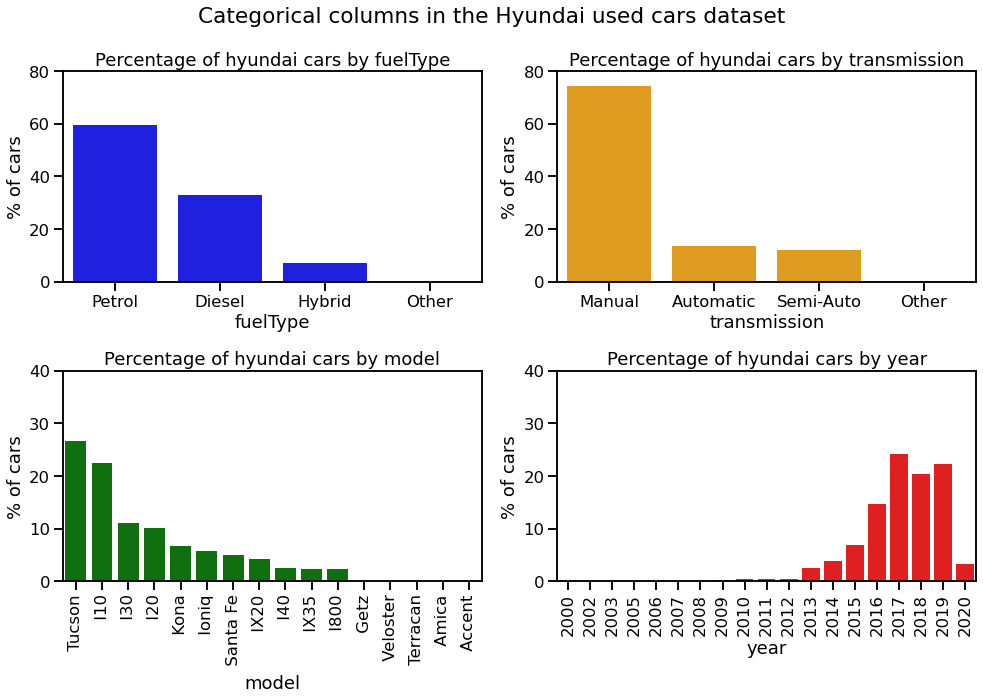

In [8]:
plt.figure(figsize = (14,10))

#Subplotting the fuelType column
plt.subplot(2,2,1)
barplot(fuelType_count, "fuelType" ,"% of cars" ,"blue" ,np.arange(0,81,20), 0)

#Subplotting the transmission column
plt.subplot(2,2,2)
barplot(transmission_count, "transmission" ,"% of cars" ,"orange" ,np.arange(0,81,20), 0)

#Subplotting the model column
plt.subplot(2,2,3)
barplot(model_count, "model" ,"% of cars" ,"green" ,np.arange(0,41,10), 90)

#Subplotting the year column
plt.subplot(2,2,4)
barplot(year_count, "year" ,"% of cars" ,"red" ,np.arange(0,41,10), 90)

#Creating an overall title
plt.suptitle("Categorical columns in the Hyundai used cars dataset")

plt.tight_layout()
plt.show()

#### - From the fuelType bar plot, it is evident that approximate 60% of the used Hyundai cars run by petrol. This trend is followed by diesel (35%). However, hybrid and other type cars has very limited percentage comparing to petrol and diesel type cars.

#### - From the transmission type bar plot, it can be clearly seen that manual cars skyrocketed (75%) from it's other countarparts. Automatic and semi-auto type cars share a similar percentage between them (approximate 16%) whereas, other type transmission has so limited vaule that is is not clearly seen the plot.

#### - From the model bar plot, Tuscon has the highest percentage (27%) of Hyundai car set. It is followed by I10 model which comprises of almost 22%. After that, the percentage gradually decreases to I30 and I20 which shares nearly 10% each between them. This trend marginally decreases to rest of the models from Kona to I8000. Lastly, the rest of the models have relatively less value that is is hardly seen in the bar plot.

#### - Lastly, in the year plot, proportion of Hyundai car is very less from the years 2000-2012. After that the percentage significantly rises to nearabout 23% which is the highest proportion in any given year. After a slight decrease in 2018, it again rises to approximate 21% in 2019. In 2020 it falls down to almost 5%.

### Creating scatterplots of numerical columns

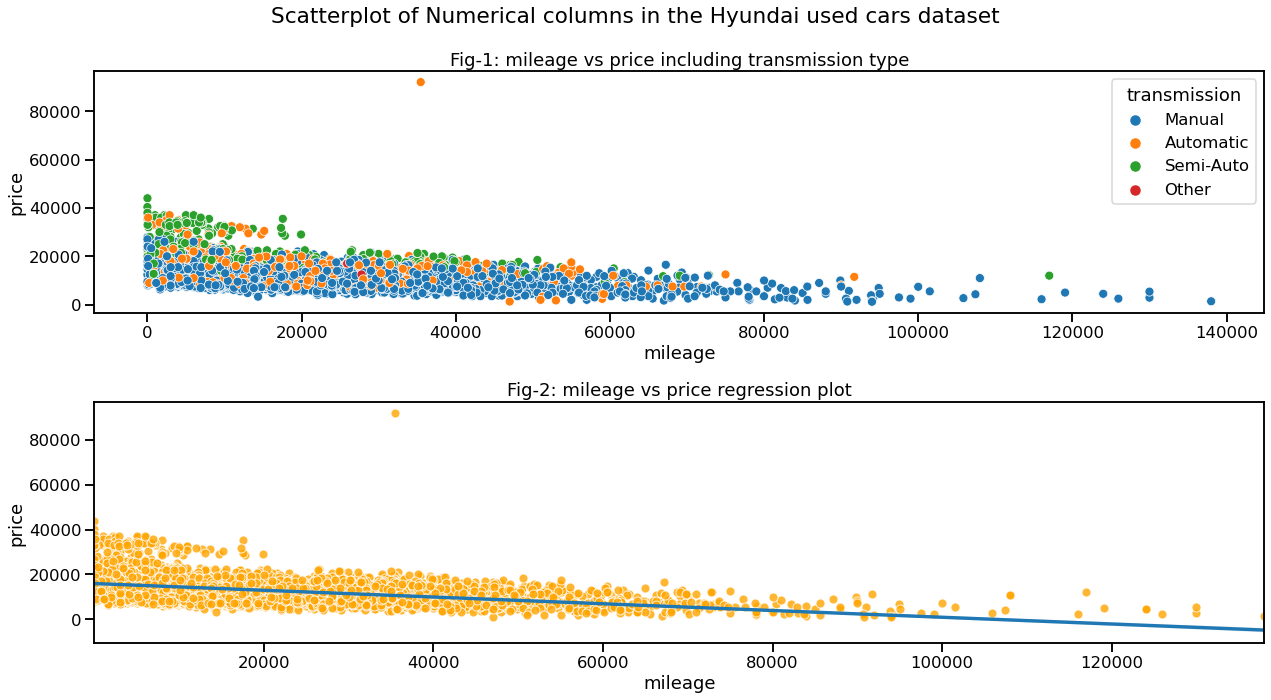

In [9]:
plt.figure(figsize=(18,10))

# mileage vs price adding a categorical feature: 'transmission' by using seaborn
plt.subplot(2,1,1)
plt.title("Fig-1: mileage vs price including transmission type")
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')

# mileage vs price regression plot by using seaborn
plt.subplot(2,1,2)
plt.title("Fig-2: mileage vs price regression plot")
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'white'})

#Overall title name
plt.suptitle("Scatterplot of Numerical columns in the Hyundai used cars dataset")

plt.tight_layout()
plt.show()

#### - From figure 1 we can see that, the price of Automatic and Semi-Auto cars are generally higher than manual cars
#### - From figure 2 we can see from the trendline that, if the mileage is higher price of the car will generally decrease

### Creating histogram plots from the numerical columns

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


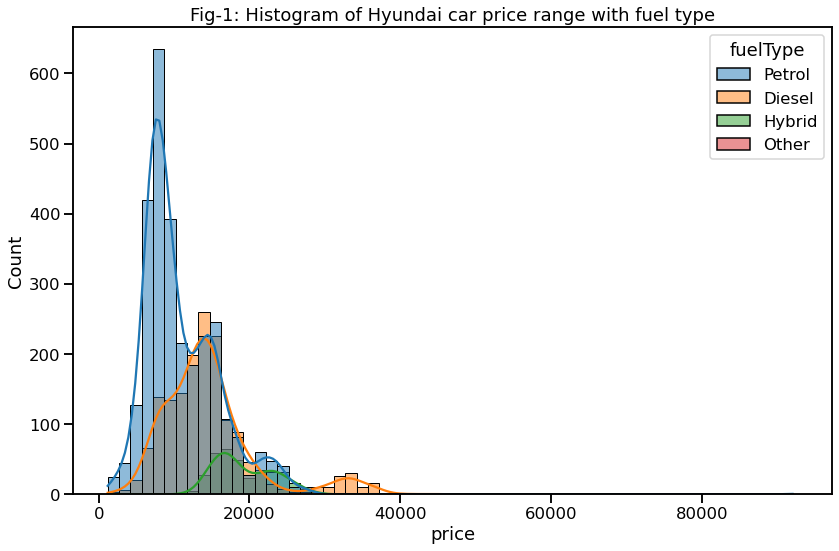

In [10]:
plt.figure(figsize = (12,8))

# histogram of price column with trend line by using seaborn
plt.title("Fig-1: Histogram of Hyundai car price range with fuel type")
sns.histplot(data = df, x = "price", binwidth = 1500, kde = True, hue = "fuelType")

plt.tight_layout()
plt.show()

#### - Figure 1 illustrates normally distributed curve for the price column according to the fuel type. Majority of the cars from the dataset are of petrol type and have a relatively low price than others. This trend is followed by diesel and hybrid cars with a significant higher price range. Also, the price range distribution of petrol car is Leptokurtic, the price range distribution of diesel car is Mesiokurtic, and the price range distribution of hybrid car is Platykurtic. Also, other values are so limited that there is no trendline for the same.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


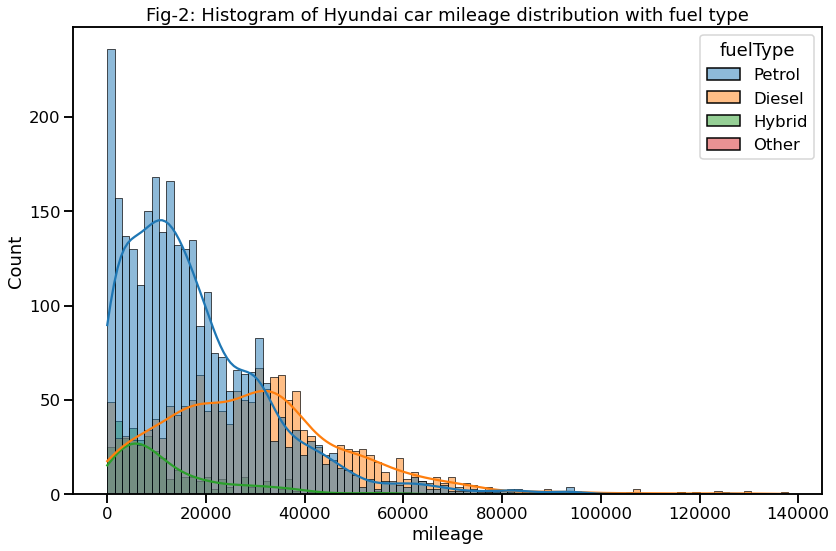

In [11]:
plt.figure(figsize = (12,8))

# histogram of mileage column with fuel type trend line by using seaborn
plt.title("Fig-2: Histogram of Hyundai car mileage distribution with fuel type")
sns.histplot(data = df, x = "mileage", binwidth = 1500, kde = True, hue = "fuelType")

plt.tight_layout()
plt.show()

#### - Figure 2  indicates normally distributed curve for the mileage column according to the fuel type. Overall, petrol type cars consist of relatively low mileage than diesel and hybrid cars. Also, petrol, diesel, and hybrid car mileage trend are Leptokurtic, Mesiokurtic, and Platykurtic accordingly. The other values are so limited that there is no trendline for the same.

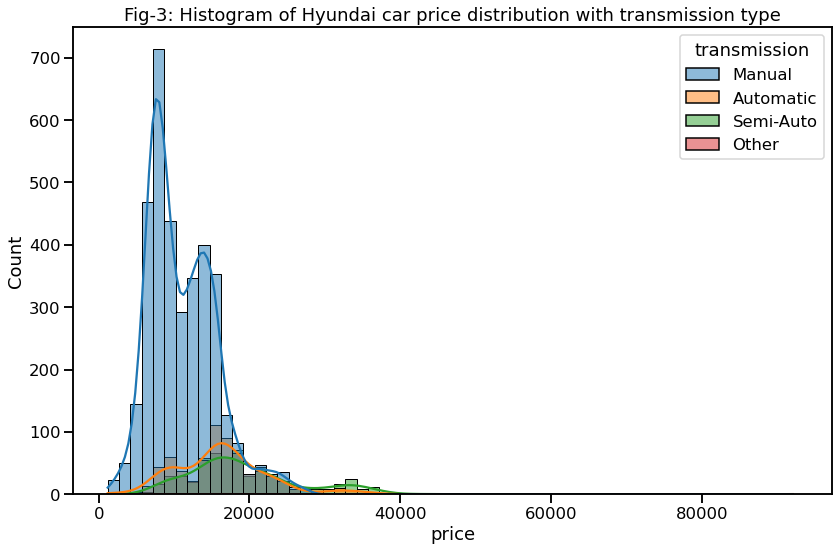

In [12]:
plt.figure(figsize = (12,8))

#histogram of price column with trend line by using seaborn
plt.title("Fig-3: Histogram of Hyundai car price distribution with transmission type")
sns.histplot(data = df, x = "price", binwidth = 1500, kde = True, hue = "transmission")

plt.tight_layout()
plt.show()

#### - From figure 3, majority of the dataset is of manual cars. The number of automatic and semi-auto cars are less than 100. 

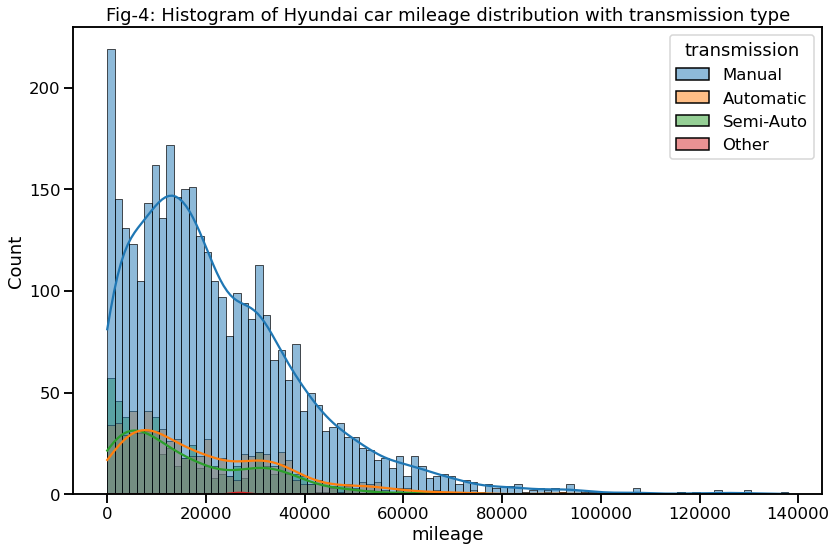

In [13]:
plt.figure(figsize = (12,8))

#histogram of mileage column with trend line by using seaborn
plt.title("Fig-4: Histogram of Hyundai car mileage distribution with transmission type")
sns.histplot(data = df, x = "mileage", binwidth = 1500, kde = True, hue = "transmission")

plt.tight_layout()
plt.show()

#### - From figure 3, majority of the dataset is of manual cars. The number of automatic and semi-auto cars are less than 40. 

### Creating ECDF plot from the numerical columns

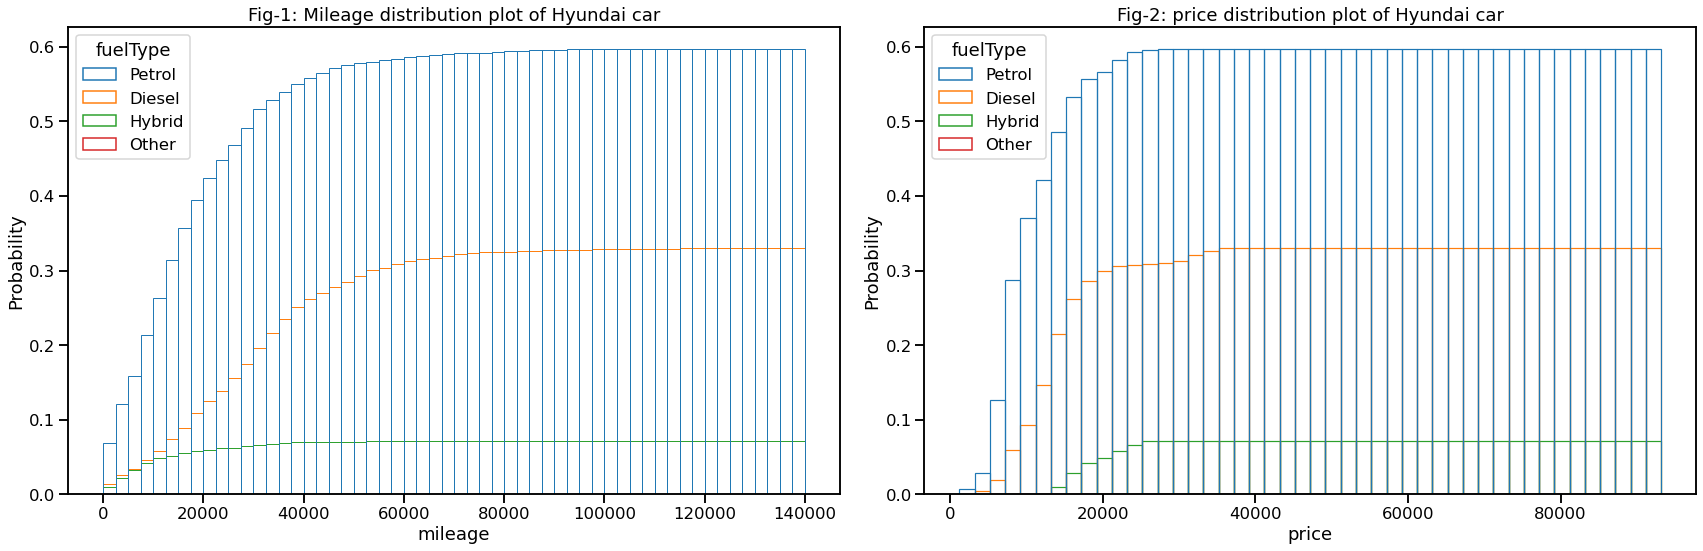

In [14]:
#Distribution plot of mileage column using seaborn
plt.figure(figsize = (24,8))

plt.subplot(1,2,1)
plt.title("Fig-1: Mileage distribution plot of Hyundai car")
sns.histplot(data = df, x = "mileage", cumulative=True,stat='probability', binwidth = 2500, hue = "fuelType", fill=False)

#Distribution plot of price column using seaborn
plt.subplot(1,2,2)
plt.title("Fig-2: price distribution plot of Hyundai car")
sns.histplot(data = df, x = "price", cumulative=True,stat='probability', binwidth = 2000, hue = "fuelType", fill=False)

plt.tight_layout()
plt.show()

#### - Figure 1 illustrates a distribution plot for the mileage column. From the diagram we can see that, the probablity of the mileage for each fuel type cars. For example, the probablity of petrol cars mileage being 40,000 or less is 0.55 approximately. Similarly, the probablity of a diesel card having a mileage of 20,000 is just over 0.1.

#### - Figure 2 illustrates a distribution plot for the price column. The diagram gives the probablity data for each fuel type cars for any given price. For instance, the probablity of a petrol car having a price of 20,000 or less is nearly 0.55. Similarly, the probable price of a hybrid car being 30,000 or less is 0.05.

### Creating boxplot from the numerical columns

#### Create a function  to separate the integer values from the dataset

In [15]:
def separate_int_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64'):
            num_cols.append(col)
        
    return num_cols

#Create a variable and print the numerical column names
numeric_cols = separate_int_cols(df)
print(numeric_cols)

['year', 'price', 'mileage']


#### Create a for loop to show the boxplots of year, price, and mileage features adding hue "fuelType"

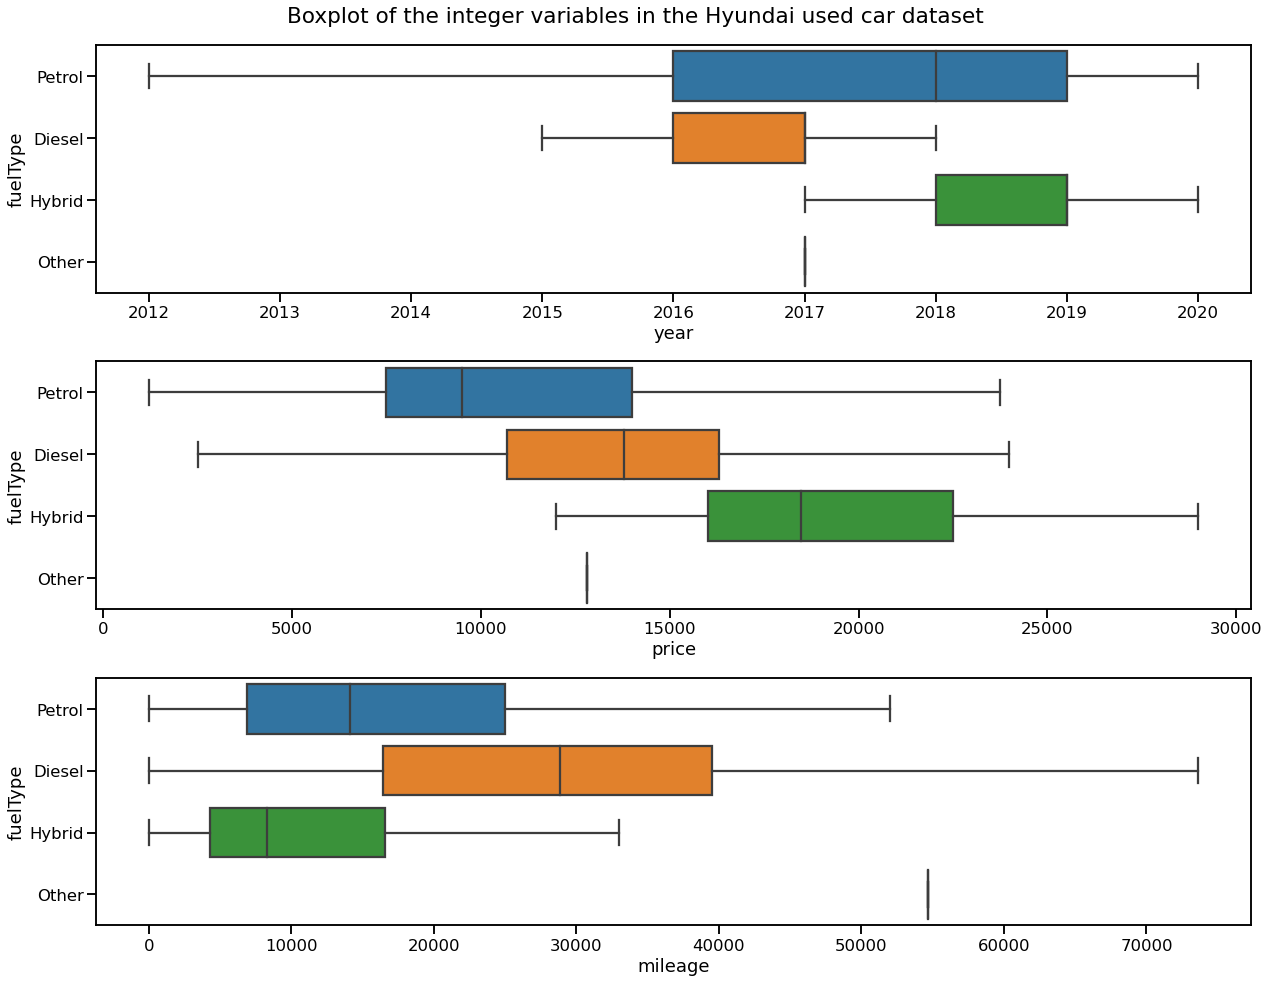

In [16]:
plt.figure(figsize=(18,14))
for index in range(len(numeric_cols)):
    plt.subplot(3,1,index+1)
    sns.boxplot(x=df[numeric_cols[index]], y=df['fuelType'], showfliers=False)

plt.suptitle("Boxplot of the integer variables in the Hyundai used car dataset")
plt.tight_layout()
plt.show()

#### - All the graphs have been plotted after discarding outliers. 

#### - From the "year" boxplot it can be seen that 75% of petrol and diesel cars were introduced after 2016. All of the hybrid cars were manufactured after 2017. The median values of diesel and hybrid cars are not present in the plot because they are in the outlier region. 

#### - From the "price" graph, the median price of petrol driven cars is about 9000 and the IQR is nearabout 7000. The median price of diesel car set is about 14000 and the IQR is 6000. In regards to hybrid cars, the median value is close to 18000 and the IQR is 7000 which indicates that most of the hybrid cars are expensive then their diesel and petrol countarparts. Finally, the other type plot has scant values so the graph is barely visible.

#### - From the "mileage" boxplot, diesel cars has the highest interquartile range (approx 22000) comparing to the other three fuel types. It also has the highest median value (about 29000) and the maximum value surpasses 70000 in the dataset. So diesel cars provide the highest mileage in comparisn to the other fuel types.

#### Create a for loop to show the boxplots of year, price, and mileage features adding hue "Transmission"

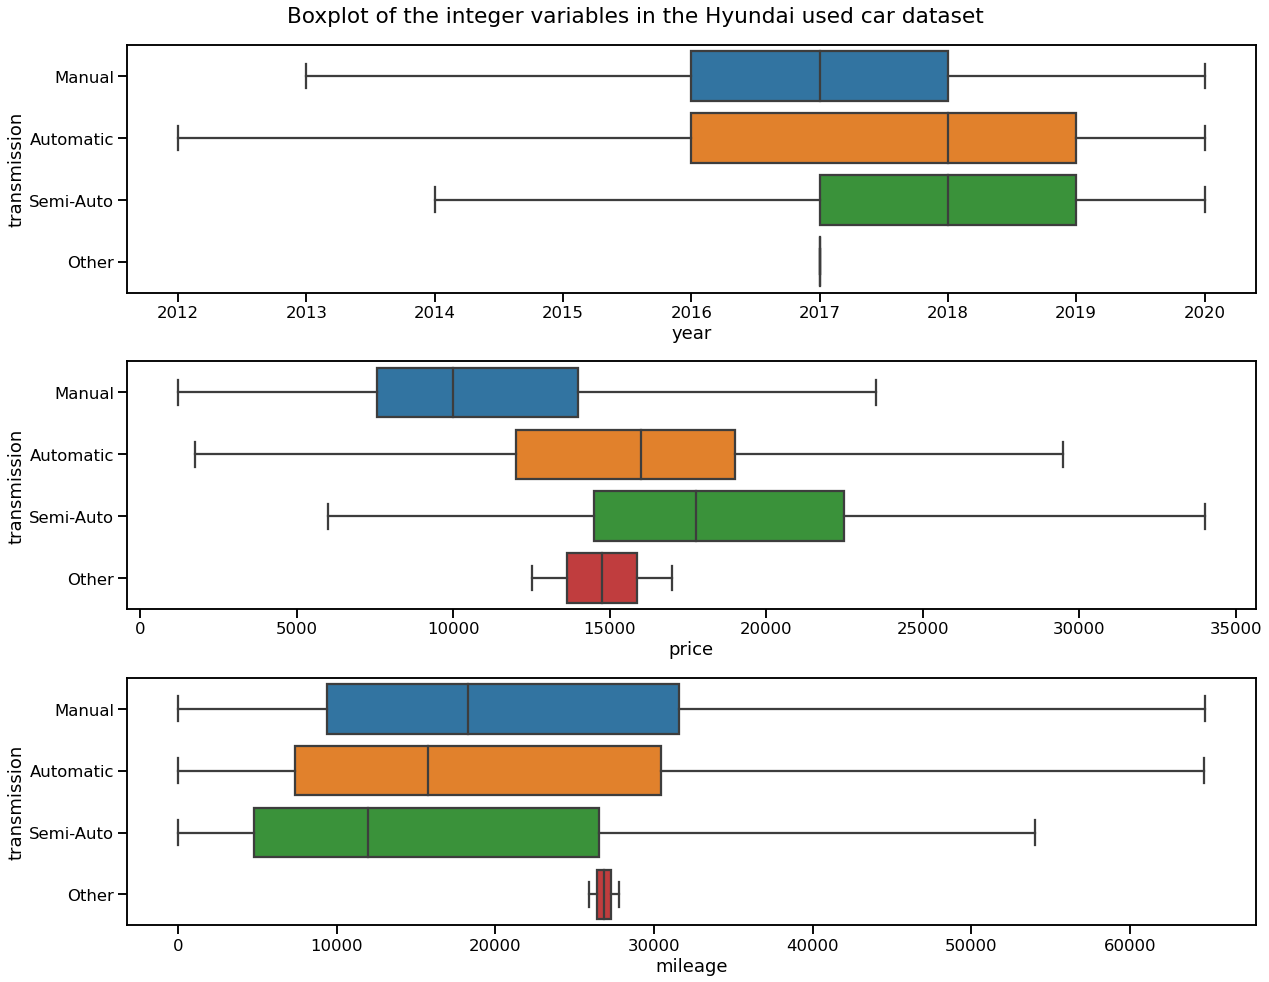

In [17]:
plt.figure(figsize=(18,14))
for index in range(len(numeric_cols)):
    plt.subplot(3,1,index+1)
    sns.boxplot(x=df[numeric_cols[index]], y=df['transmission'], showfliers=False)

plt.suptitle("Boxplot of the integer variables in the Hyundai used car dataset")
plt.tight_layout()
plt.show()

#### - All the graphs have been plotted after discarding outliers. 

#### - From the "year" boxplot it can be seen that 75% of the manual and automatic cars were introduced after 2016 and semi auto cars were manufactured after 2017. The median value of both auto and semi auto car is 2018. Automatic car has the highest interquartile range comparing to the rest of the cars.

#### - With regards to the "price" boxplot semi-auto car has the highest median value (approx 17000) followed by automatic and manual cars. Other car type has insignificat value therefore it cannot be compared with the rest car types.

#### - In "mileage" box plot, manual car type has the highest median and IQR value followed by automatic and semi auto type cars. Finallyl, it also limited other car type data and therefore it is not comparable to the rest of the dataset. 